In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Prophet import
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [3]:
geoloc_dict_csv = "incident_zipcode_newzone.csv"
dtypes = {
    'Master_Incident_Number': 'str',
    'Zipcode': 'str',
    'New_Zone': 'int',
    'Mission_Type': 'int',
    'Response_Date': 'str'
}
parse_dates = ['Response_Date']

In [4]:
data_zones = pd.read_csv(geoloc_dict_csv, dtype=dtypes, parse_dates=parse_dates)
data_zones['Response_Date_Day'] = data_zones['Response_Date'].dt.date

# Zone 1: Downtown

In [5]:
dispatch_11 = data_zones[(data_zones['New_Zone'] == 0) & (data_zones['Mission_Type'] == 0)]
dispatch_11 = dispatch_11.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_12 = data_zones[(data_zones['New_Zone'] == 0) & (data_zones['Mission_Type'] == 1)]
dispatch_12 = dispatch_12.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_13 = data_zones[(data_zones['New_Zone'] == 0) & (data_zones['Mission_Type'] == 2)]
dispatch_13 = dispatch_13.groupby(['Response_Date_Day']).count()['Master_Incident_Number']

Text(0.5,1,'Zone 1')

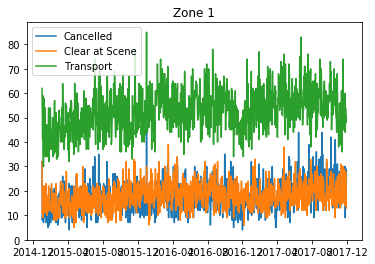

In [6]:
plt.plot(dispatch_11, label='Cancelled')
plt.plot(dispatch_12, label='Clear at Scene')
plt.plot(dispatch_13, label='Transport')
plt.legend()
plt.title('Zone 1')

In [7]:
len(dispatch_13)

1064

## Prophet analysis 11

In [8]:
df_dispatch_11 = pd.DataFrame(dispatch_11.index)
df_dispatch_11['y'] = dispatch_11.values
df_dispatch_11.columns = ['ds', 'y']

m11 = Prophet(daily_seasonality=False)
m11.fit(df_dispatch_11)
future = m11.make_future_dataframe(periods=365)
forecast = m11.predict(future)

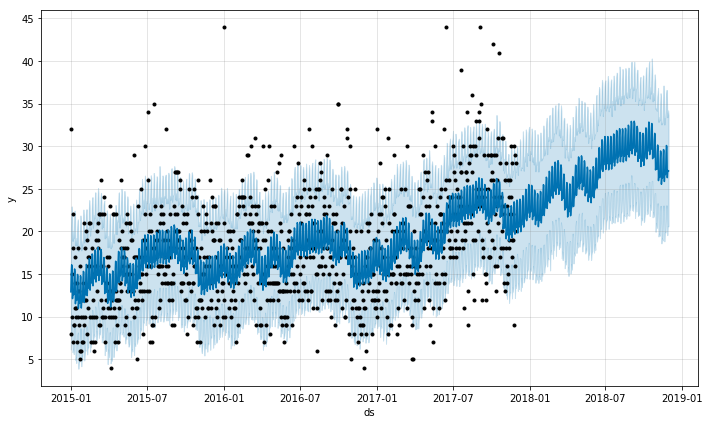

In [9]:
fig = m11.plot(forecast)

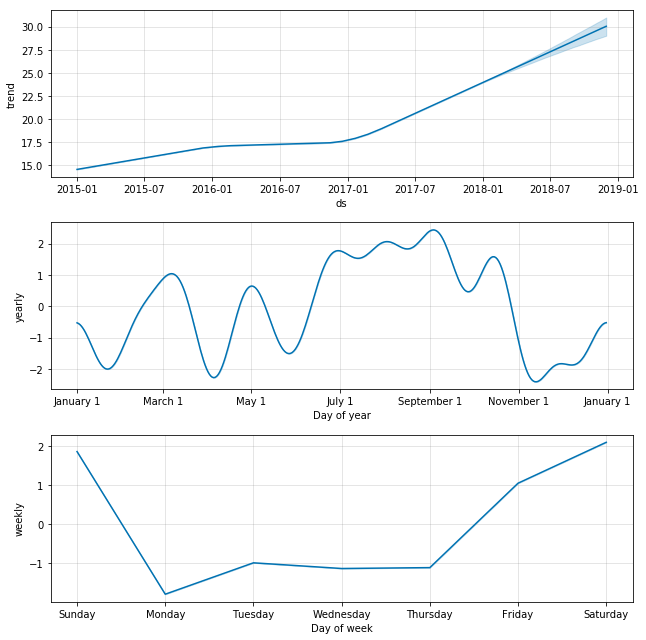

In [10]:
fig = m11.plot_components(forecast)

In [11]:
df_cv = cross_validation(m11, initial='851 days', period='1 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  50.178979  7.083712  5.549834  0.313396  0.666667
21 22 days  50.827160  7.129317  5.665657  0.319492  0.666667
22 23 days  45.596520  6.752520  5.170986  0.301323  0.714286
23 24 days  46.687595  6.832832  5.332699  0.309601  0.714286
24 25 days  46.901142  6.848441  5.348703  0.297954  0.714286

In [12]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.2677134022324727


## Prophet analysis 12

In [13]:
df_dispatch_12 = pd.DataFrame(dispatch_12.index)
df_dispatch_12['y'] = dispatch_12.values
df_dispatch_12.columns = ['ds', 'y']

m12 = Prophet(daily_seasonality=False)
m12.fit(df_dispatch_12)
future = m12.make_future_dataframe(periods=365)
forecast = m12.predict(future)

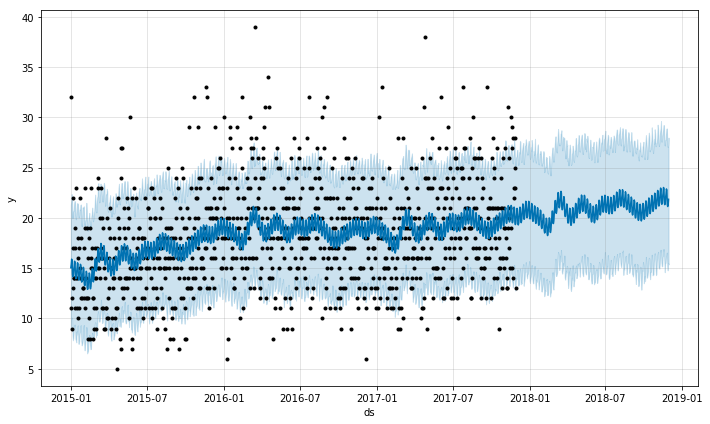

In [14]:
fig = m12.plot(forecast)

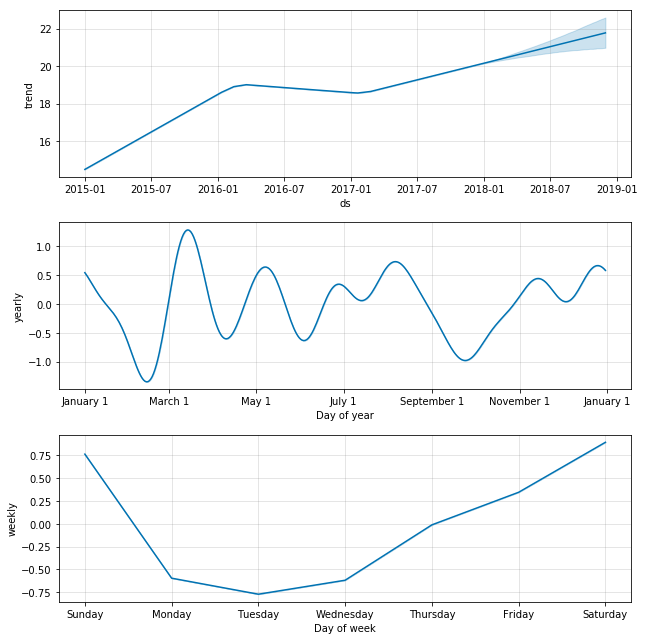

In [15]:
fig = m12.plot_components(forecast)

In [16]:
df_cv = cross_validation(m12, initial='851 days', period='1 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  20.818844  4.562767  3.780687  0.186374  0.809524
21 22 days  20.711925  4.551036  3.750328  0.185740  0.809524
22 23 days  18.599975  4.312769  3.500224  0.177219  0.857143
23 24 days  17.468498  4.179533  3.346488  0.172816  0.857143
24 25 days  18.332726  4.281673  3.476527  0.178303  0.857143

In [17]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.21887936252885112


## Prophet analysis 13

In [18]:
df_dispatch_13 = pd.DataFrame(dispatch_13.index)
df_dispatch_13['y'] = dispatch_13.values
df_dispatch_13.columns = ['ds', 'y']

m13 = Prophet(daily_seasonality=False)
m13.fit(df_dispatch_13)
future = m13.make_future_dataframe(periods=365)
forecast = m13.predict(future)

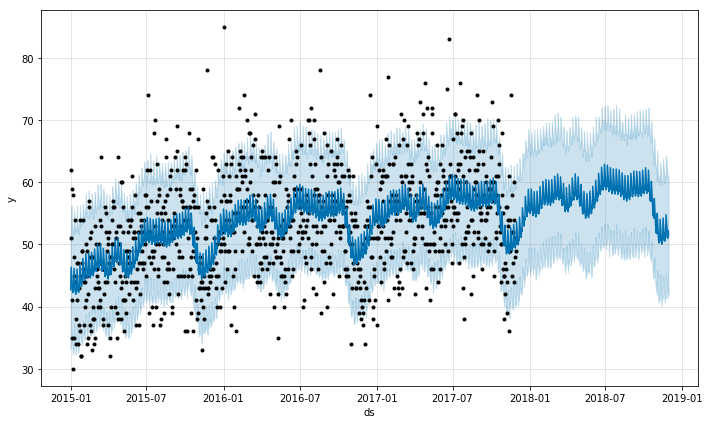

In [19]:
fig = m13.plot(forecast)

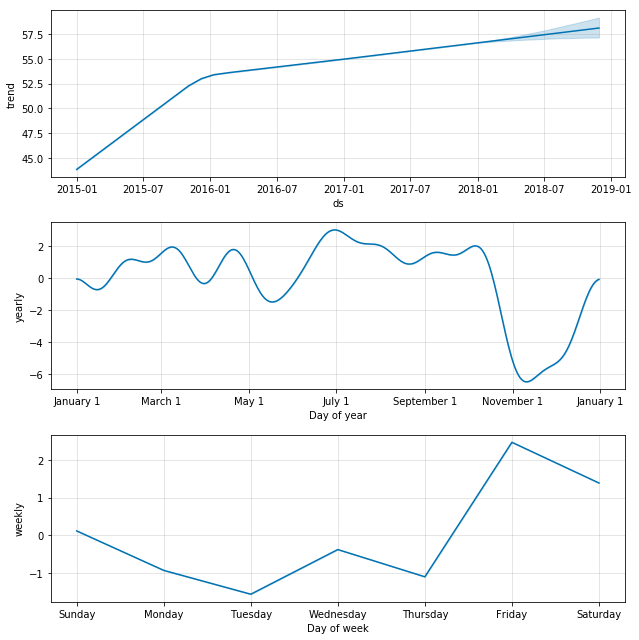

In [20]:
fig = m13.plot_components(forecast)

In [21]:
df_cv = cross_validation(m13, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  60.859670  7.801261  5.970199  0.103574  0.809524
21 22 days  59.943192  7.742299  5.911003  0.102897  0.809524
22 23 days  63.713388  7.982067  6.072611  0.105121  0.761905
23 24 days  64.917396  8.057133  6.216757  0.107528  0.761905
24 25 days  65.701114  8.105622  6.355172  0.109736  0.761905

In [22]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.10233126095343681


# Zone 2: Uptown, City Heights

In [23]:
dispatch_21 = data_zones[(data_zones['New_Zone'] == 1) & (data_zones['Mission_Type'] == 0)]
dispatch_21 = dispatch_21.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_22 = data_zones[(data_zones['New_Zone'] == 1) & (data_zones['Mission_Type'] == 1)]
dispatch_22 = dispatch_22.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_23 = data_zones[(data_zones['New_Zone'] == 1) & (data_zones['Mission_Type'] == 2)]
dispatch_23 = dispatch_23.groupby(['Response_Date_Day']).count()['Master_Incident_Number']

Text(0.5,1,'Zone 2')

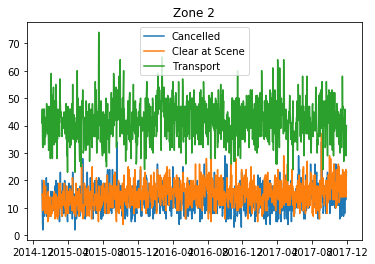

In [24]:
plt.plot(dispatch_21, label='Cancelled')
plt.plot(dispatch_22, label='Clear at Scene')
plt.plot(dispatch_23, label='Transport')
plt.legend()
plt.title('Zone 2')

## Prophet analysis 21

In [25]:
df_dispatch_21 = pd.DataFrame(dispatch_21.index)
df_dispatch_21['y'] = dispatch_21.values
df_dispatch_21.columns = ['ds', 'y']

m21 = Prophet(daily_seasonality=False)
m21.fit(df_dispatch_21)
future = m21.make_future_dataframe(periods=365)
forecast = m21.predict(future)

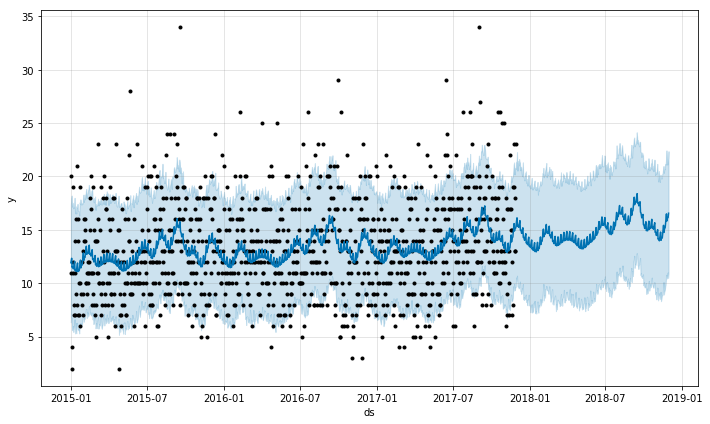

In [26]:
fig = m21.plot(forecast)

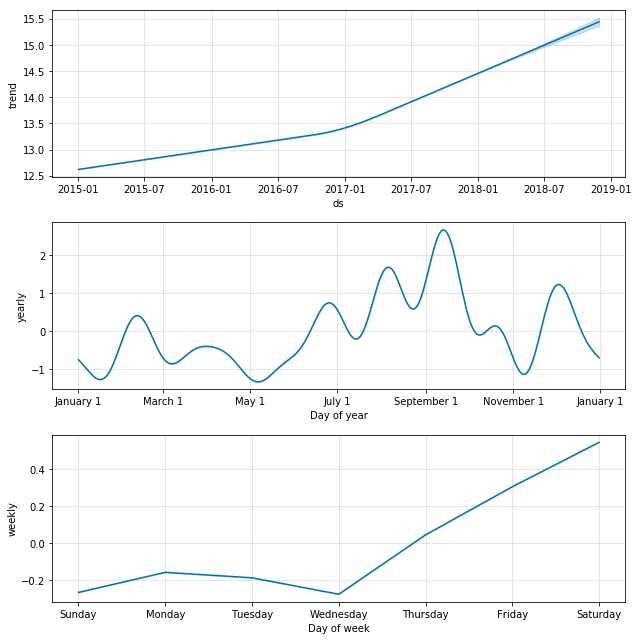

In [27]:
fig = m21.plot_components(forecast)

In [28]:
df_cv = cross_validation(m21, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  25.051677  5.005165  4.065247  0.436523  0.666667
21 22 days  20.988387  4.581308  3.798605  0.427471  0.714286
22 23 days  21.355083  4.621156  3.877962  0.437070  0.714286
23 24 days  20.561804  4.534513  3.769043  0.412447  0.714286
24 25 days  19.634995  4.431139  3.678631  0.375932  0.761905

In [29]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.27871062901974963


## Prophet analysis 22

In [30]:
df_dispatch_22 = pd.DataFrame(dispatch_22.index)
df_dispatch_22['y'] = dispatch_22.values
df_dispatch_22.columns = ['ds', 'y']

m22 = Prophet(daily_seasonality=False)
m22.fit(df_dispatch_22)
future = m22.make_future_dataframe(periods=365)
forecast = m22.predict(future)

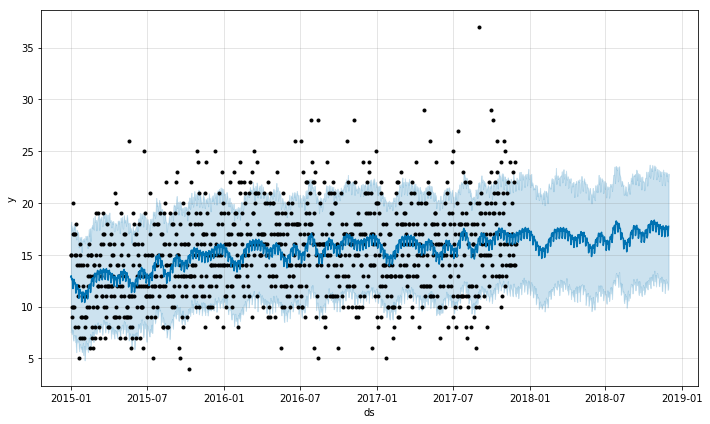

In [31]:
fig = m22.plot(forecast)

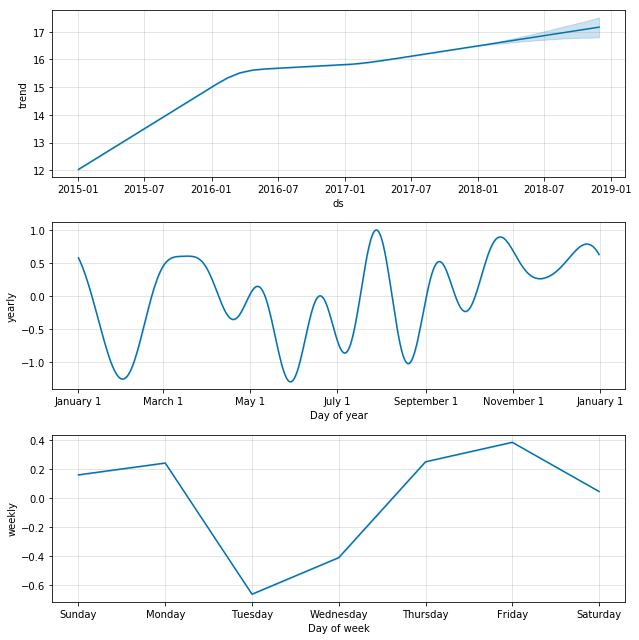

In [32]:
fig = m22.plot_components(forecast)

In [33]:
df_cv = cross_validation(m22, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  18.868767  4.343819  3.657442  0.217424  0.761905
21 22 days  24.137149  4.912957  4.129772  0.236230  0.714286
22 23 days  22.420855  4.735067  3.899016  0.226417  0.761905
23 24 days  21.034507  4.586339  3.762697  0.221978  0.809524
24 25 days  20.272131  4.502458  3.677007  0.225213  0.857143

In [34]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.2532471222953125


## Prophet analysis 23

In [35]:
df_dispatch_23 = pd.DataFrame(dispatch_23.index)
df_dispatch_23['y'] = dispatch_23.values
df_dispatch_23.columns = ['ds', 'y']

m23 = Prophet(daily_seasonality=False)
m23.fit(df_dispatch_23)
future = m23.make_future_dataframe(periods=365)
forecast = m23.predict(future)

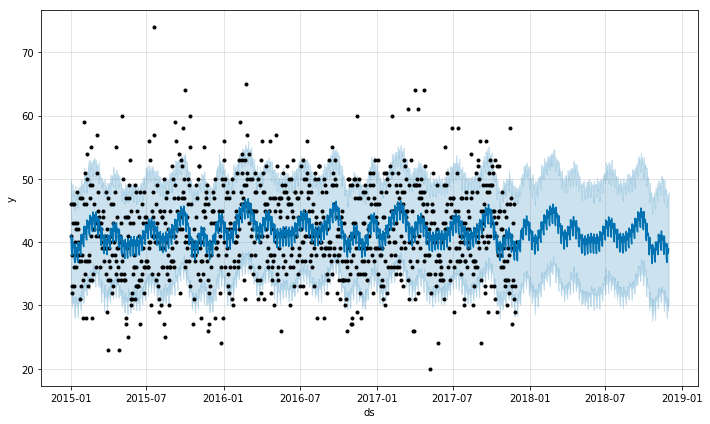

In [36]:
fig = m23.plot(forecast)

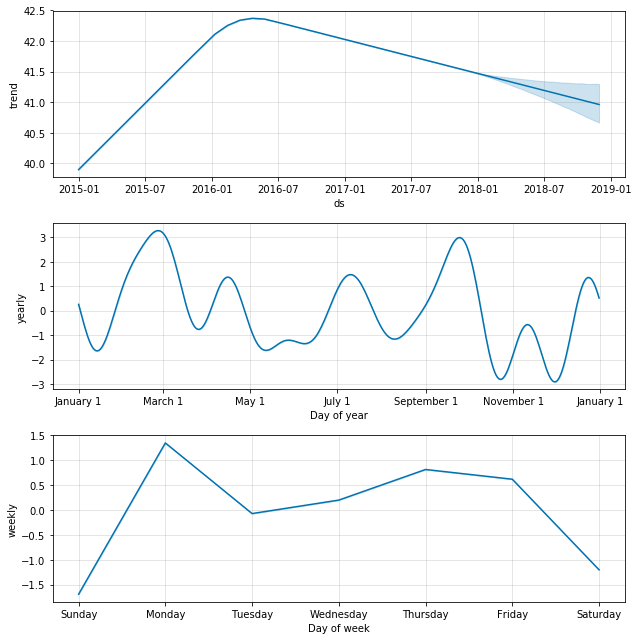

In [37]:
fig = m23.plot_components(forecast)

In [38]:
df_cv = cross_validation(m23, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  42.274217  6.501863  4.712306  0.144283  0.952381
21 22 days  44.988734  6.707364  4.912780  0.152260  0.904762
22 23 days  43.293465  6.579777  4.712399  0.146173  0.904762
23 24 days  42.595136  6.526495  4.570135  0.142315  0.904762
24 25 days  44.438975  6.666256  4.841174  0.147741  0.904762

In [39]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.13666668316780767


# Zone 3: La Jolla, UCSD

In [40]:
dispatch_31 = data_zones[(data_zones['New_Zone'] == 2) & (data_zones['Mission_Type'] == 0)]
dispatch_31 = dispatch_31.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_32 = data_zones[(data_zones['New_Zone'] == 2) & (data_zones['Mission_Type'] == 1)]
dispatch_32 = dispatch_32.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_33 = data_zones[(data_zones['New_Zone'] == 2) & (data_zones['Mission_Type'] == 2)]
dispatch_33 = dispatch_33.groupby(['Response_Date_Day']).count()['Master_Incident_Number']

Text(0.5,1,'Zone 3')

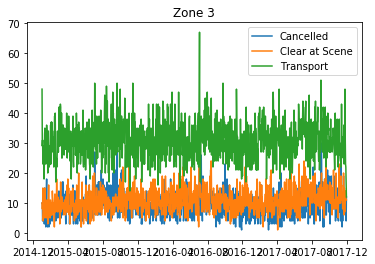

In [41]:
plt.plot(dispatch_31, label='Cancelled')
plt.plot(dispatch_32, label='Clear at Scene')
plt.plot(dispatch_33, label='Transport')
plt.legend()
plt.title('Zone 3')

## Prophet analysis 31

In [42]:
df_dispatch_31 = pd.DataFrame(dispatch_31.index)
df_dispatch_31['y'] = dispatch_31.values
df_dispatch_31.columns = ['ds', 'y']

m31 = Prophet(daily_seasonality=False)
m31.fit(df_dispatch_31)
future = m31.make_future_dataframe(periods=365)
forecast = m31.predict(future)

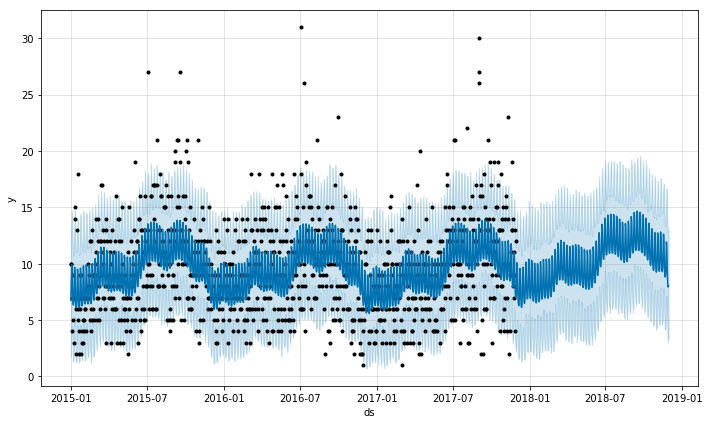

In [43]:
fig = m31.plot(forecast)

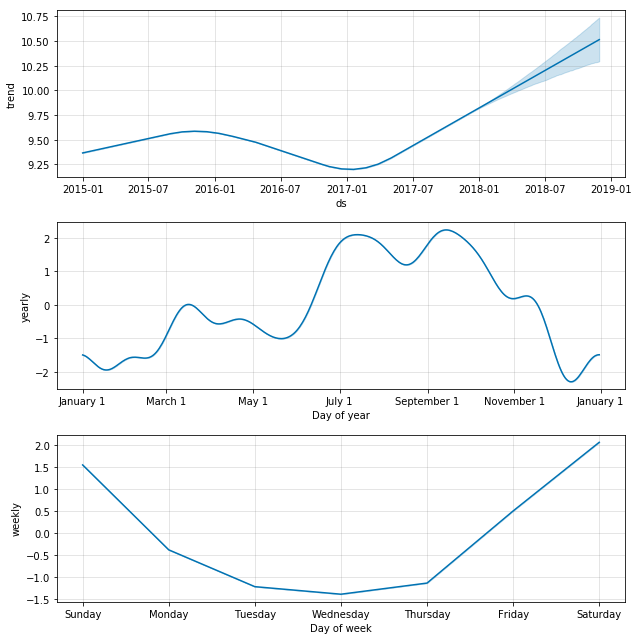

In [44]:
fig = m31.plot_components(forecast)

In [45]:
df_cv = cross_validation(m31, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon       mse      rmse       mae      mape  coverage
20 21 days  8.511006  2.917363  2.276472  0.350316  0.857143
21 22 days  8.749983  2.958037  2.350294  0.356287  0.857143
22 23 days  9.389511  3.064231  2.500669  0.370207  0.857143
23 24 days  8.573960  2.928133  2.409238  0.365365  0.904762
24 25 days  8.950936  2.991812  2.456618  0.385498  0.904762

In [46]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.44217589617155667


## Prophet analysis 32

In [47]:
df_dispatch_32 = pd.DataFrame(dispatch_32.index)
df_dispatch_32['y'] = dispatch_32.values
df_dispatch_32.columns = ['ds', 'y']

m32 = Prophet(daily_seasonality=False)
m32.fit(df_dispatch_32)
future = m32.make_future_dataframe(periods=365)
forecast = m32.predict(future)

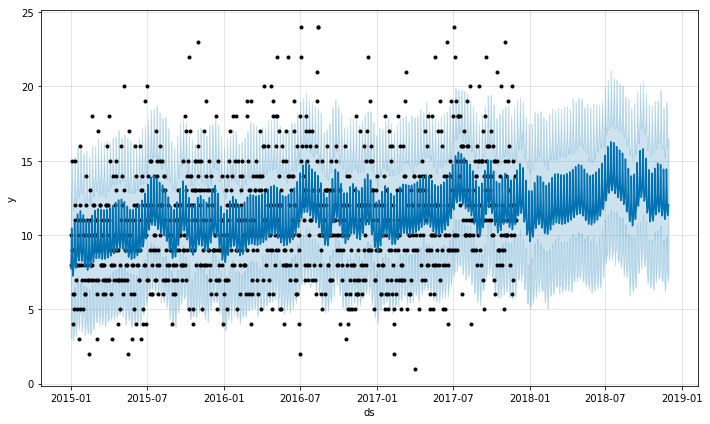

In [48]:
fig = m32.plot(forecast)

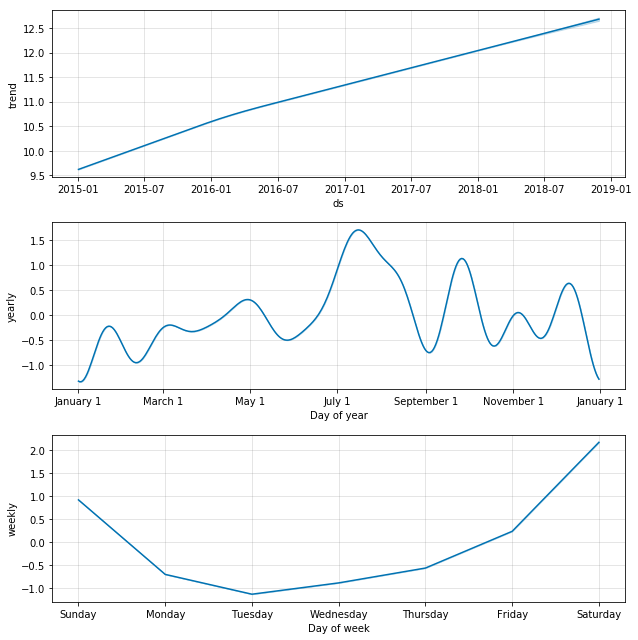

In [49]:
fig = m32.plot_components(forecast)

In [50]:
df_cv = cross_validation(m32, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  14.955705  3.867261  3.037072  0.342693  0.761905
21 22 days  15.079839  3.883277  3.059935  0.339688  0.761905
22 23 days  15.091667  3.884799  3.062091  0.334470  0.761905
23 24 days  12.787951  3.576025  2.753974  0.318683  0.809524
24 25 days  12.924127  3.595014  2.827203  0.324785  0.809524

In [51]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.24724601849402675


## Prophet analysis 33

In [52]:
df_dispatch_33 = pd.DataFrame(dispatch_33.index)
df_dispatch_33['y'] = dispatch_33.values
df_dispatch_33.columns = ['ds', 'y']

m33 = Prophet(daily_seasonality=False)
m33.fit(df_dispatch_33)
future = m33.make_future_dataframe(periods=365)
forecast = m33.predict(future)

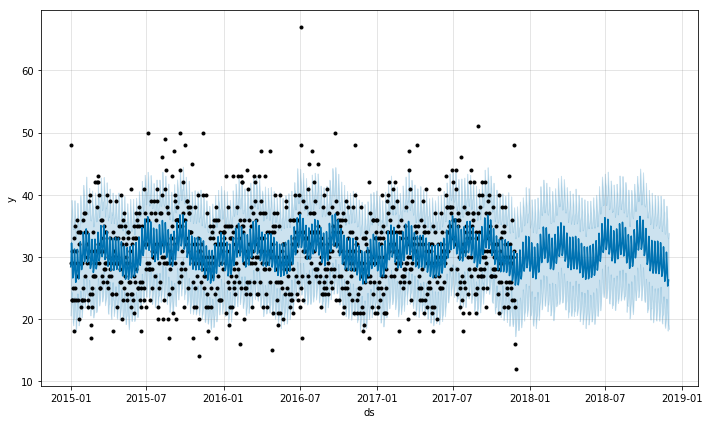

In [53]:
fig = m33.plot(forecast)

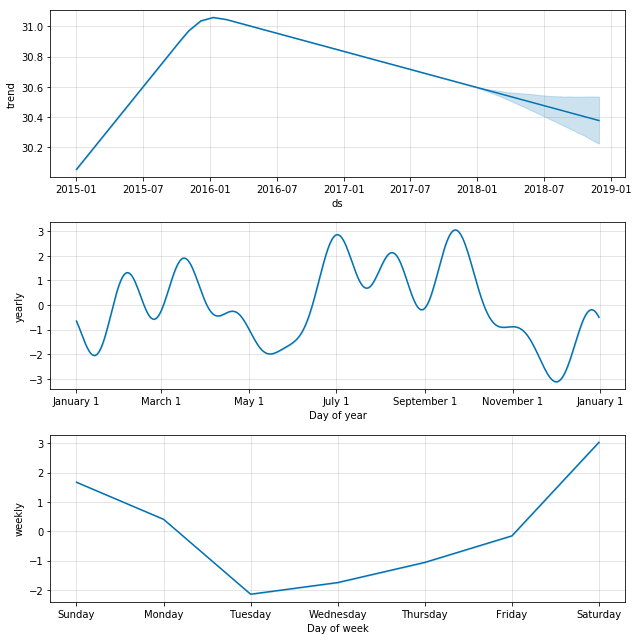

In [54]:
fig = m33.plot_components(forecast)

In [55]:
df_cv = cross_validation(m33, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  21.995339  4.689919  3.810812  0.151483  0.857143
21 22 days  20.751256  4.555355  3.672197  0.143432  0.857143
22 23 days  21.797838  4.668815  3.752102  0.153025  0.857143
23 24 days  21.356110  4.621267  3.665023  0.149423  0.857143
24 25 days  20.937362  4.575736  3.576977  0.145682  0.857143

In [56]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.14924164670504683


# Zone 4: SDSU

In [117]:
dispatch_41 = data_zones[(data_zones['New_Zone'] == 3) & (data_zones['Mission_Type'] == 0)]
dispatch_41 = dispatch_41.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_42 = data_zones[(data_zones['New_Zone'] == 3) & (data_zones['Mission_Type'] == 1)]
dispatch_42 = dispatch_42.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_43 = data_zones[(data_zones['New_Zone'] == 3) & (data_zones['Mission_Type'] == 2)]
dispatch_43 = dispatch_43.groupby(['Response_Date_Day']).count()['Master_Incident_Number']

Text(0.5,1,'Zone 4')

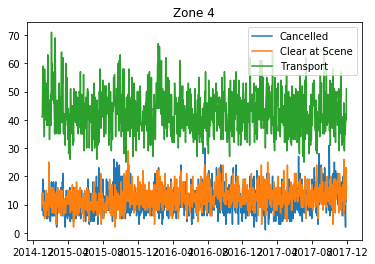

In [118]:
plt.plot(dispatch_41, label='Cancelled')
plt.plot(dispatch_42, label='Clear at Scene')
plt.plot(dispatch_43, label='Transport')
plt.legend()
plt.title('Zone 4')

## Prophet analysis 41

In [119]:
df_dispatch_41 = pd.DataFrame(dispatch_41.index)
df_dispatch_41['y'] = dispatch_41.values
df_dispatch_41.columns = ['ds', 'y']

m41 = Prophet(daily_seasonality=False)
m41.fit(df_dispatch_41)
future = m41.make_future_dataframe(periods=365)
forecast = m41.predict(future)

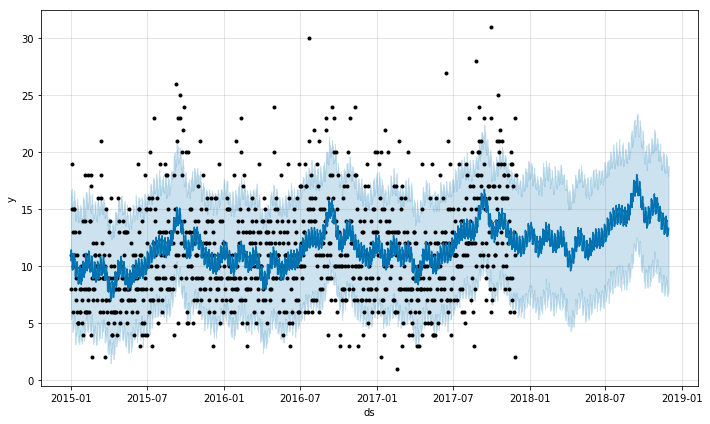

In [120]:
fig = m41.plot(forecast)

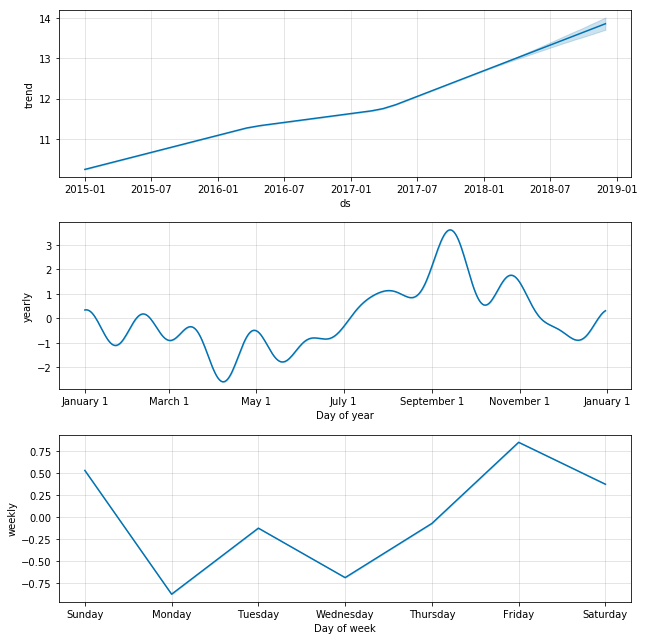

In [121]:
fig = m41.plot_components(forecast)

In [122]:
df_cv = cross_validation(m41, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  16.851083  4.105007  3.468984  0.544470  0.809524
21 22 days  18.743733  4.329403  3.725926  0.558770  0.761905
22 23 days  17.399123  4.171226  3.520162  0.513664  0.761905
23 24 days  17.715129  4.208934  3.627480  0.522483  0.761905
24 25 days  16.189078  4.023565  3.381401  0.479829  0.809524

In [123]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.3386541153366938


## Prophet analysis 42

In [130]:
df_dispatch_42 = pd.DataFrame(dispatch_42.index)
df_dispatch_42['y'] = dispatch_42.values
df_dispatch_42.columns = ['ds', 'y']

m42 = Prophet(daily_seasonality=False)
m42.fit(df_dispatch_42)
future = m42.make_future_dataframe(periods=365)
forecast = m42.predict(future)

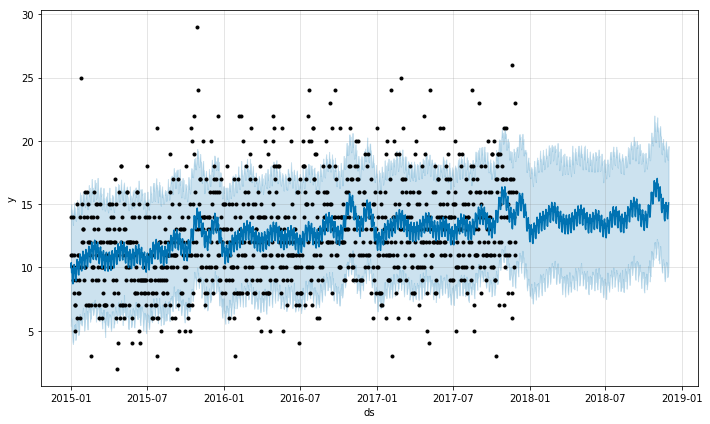

In [131]:
fig = m42.plot(forecast)

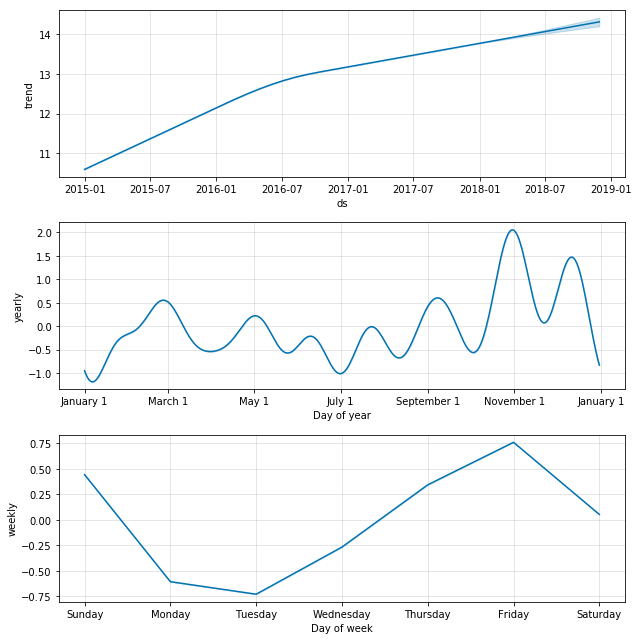

In [132]:
fig = m42.plot_components(forecast)

In [133]:
df_cv = cross_validation(m42, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  16.070833  4.008844  2.813462  0.305741  0.857143
21 22 days  16.669258  4.082800  2.934959  0.323956  0.857143
22 23 days  16.668458  4.082702  2.929740  0.323561  0.857143
23 24 days  16.692292  4.085620  2.960174  0.326138  0.857143
24 25 days  11.235444  3.351931  2.475766  0.200391  0.904762

In [134]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.25528560260557354


## Prophet analysis 43

In [135]:
df_dispatch_43 = pd.DataFrame(dispatch_43.index)
df_dispatch_43['y'] = dispatch_43.values
df_dispatch_43.columns = ['ds', 'y']

m43 = Prophet(daily_seasonality=False)
m43.fit(df_dispatch_43)
future = m43.make_future_dataframe(periods=365)
forecast = m43.predict(future)

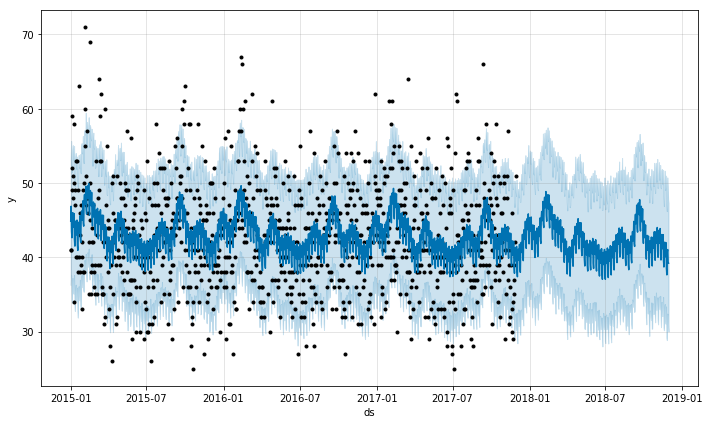

In [136]:
fig = m43.plot(forecast)

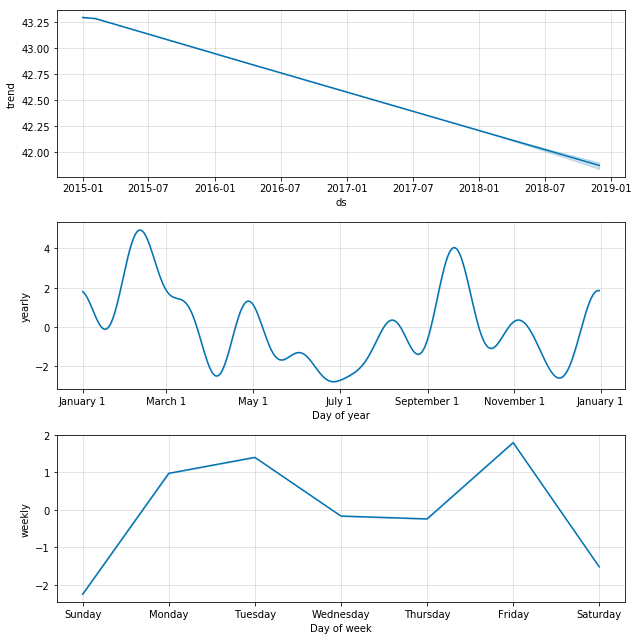

In [137]:
fig = m43.plot_components(forecast)

In [138]:
df_cv = cross_validation(m43, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  52.808029  7.266913  6.158001  0.162920  0.666667
21 22 days  55.953632  7.480216  6.385153  0.166174  0.619048
22 23 days  50.044095  7.074185  6.019631  0.153897  0.666667
23 24 days  43.540082  6.598491  5.648618  0.149572  0.714286
24 25 days  43.114912  6.566195  5.589715  0.148223  0.714286

In [139]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.14255047354833736


# Zone 5: Northwest

In [62]:
dispatch_51 = data_zones[(data_zones['New_Zone'] == 4) & (data_zones['Mission_Type'] == 0)]
dispatch_51 = dispatch_51.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_52 = data_zones[(data_zones['New_Zone'] == 4) & (data_zones['Mission_Type'] == 1)]
dispatch_52 = dispatch_52.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_53 = data_zones[(data_zones['New_Zone'] == 4) & (data_zones['Mission_Type'] == 2)]
dispatch_53 = dispatch_53.groupby(['Response_Date_Day']).count()['Master_Incident_Number']

Text(0.5,1,'Zone 5')

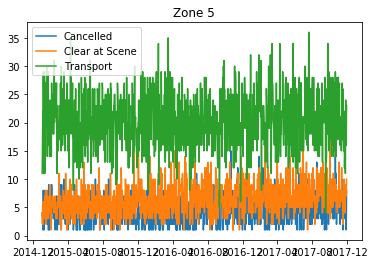

In [63]:
plt.plot(dispatch_51, label='Cancelled')
plt.plot(dispatch_52, label='Clear at Scene')
plt.plot(dispatch_53, label='Transport')
plt.legend()
plt.title('Zone 5')

# Zone 6: Southeast

In [64]:
dispatch_61 = data_zones[(data_zones['New_Zone'] == 5) & (data_zones['Mission_Type'] == 0)]
dispatch_61 = dispatch_61.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_62 = data_zones[(data_zones['New_Zone'] == 5) & (data_zones['Mission_Type'] == 1)]
dispatch_62 = dispatch_62.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_63 = data_zones[(data_zones['New_Zone'] == 5) & (data_zones['Mission_Type'] == 2)]
dispatch_63 = dispatch_63.groupby(['Response_Date_Day']).count()['Master_Incident_Number']

Text(0.5,1,'Zone 6')

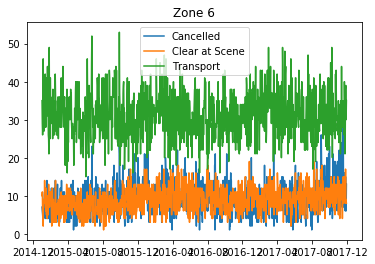

In [65]:
plt.plot(dispatch_61, label='Cancelled')
plt.plot(dispatch_62, label='Clear at Scene')
plt.plot(dispatch_63, label='Transport')
plt.legend()
plt.title('Zone 6')

## Prophet analysis 61

In [66]:
df_dispatch_61 = pd.DataFrame(dispatch_61.index)
df_dispatch_61['y'] = dispatch_61.values
df_dispatch_61.columns = ['ds', 'y']

m61 = Prophet(daily_seasonality=False)
m61.fit(df_dispatch_61)
future = m61.make_future_dataframe(periods=365)
forecast = m61.predict(future)

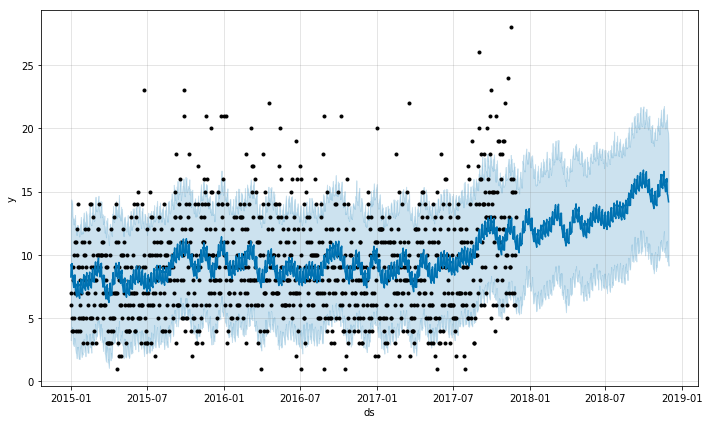

In [67]:
fig = m61.plot(forecast)

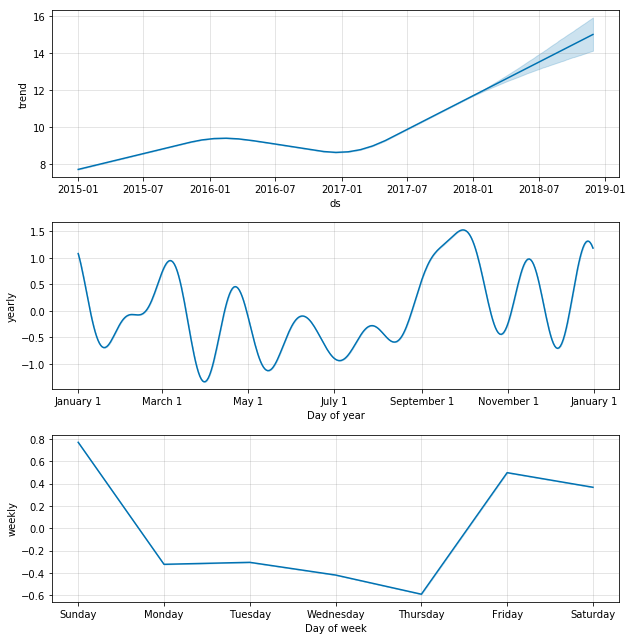

In [68]:
fig = m61.plot_components(forecast)

In [69]:
df_cv = cross_validation(m61, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  15.702687  3.962662  3.659531  0.721339  0.666667
21 22 days  14.944496  3.865811  3.556893  0.716318  0.714286
22 23 days  17.436742  4.175732  3.789470  0.713310  0.666667
23 24 days  17.005263  4.123744  3.732581  0.658847  0.714286
24 25 days  19.156366  4.376799  3.949077  0.982279  0.666667

In [70]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.5338555154838982


## Prophet analysis 62

In [71]:
df_dispatch_62 = pd.DataFrame(dispatch_62.index)
df_dispatch_62['y'] = dispatch_62.values
df_dispatch_62.columns = ['ds', 'y']

m62 = Prophet(daily_seasonality=False)
m62.fit(df_dispatch_62)
future = m62.make_future_dataframe(periods=365)
forecast = m62.predict(future)

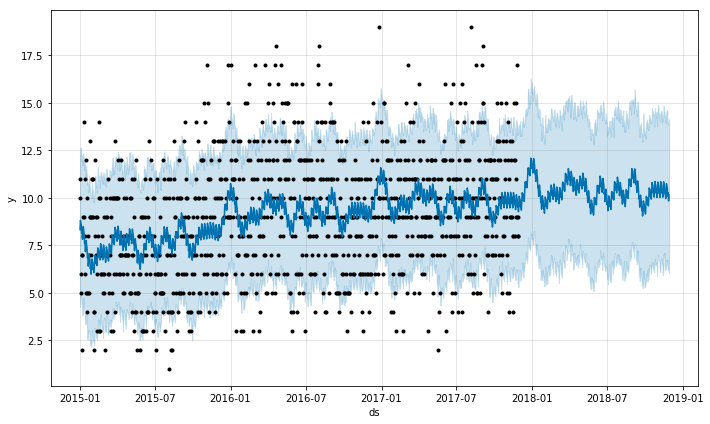

In [72]:
fig = m62.plot(forecast)

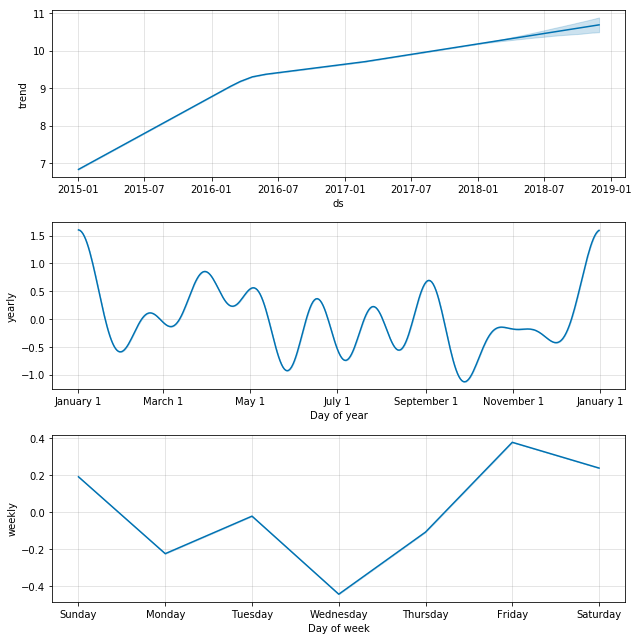

In [73]:
fig = m62.plot_components(forecast)

In [74]:
df_cv = cross_validation(m62, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon       mse      rmse       mae      mape  coverage
20 21 days  7.633848  2.762942  2.134433  0.419273  0.857143
21 22 days  7.838288  2.799694  2.172379  0.439614  0.857143
22 23 days  7.774451  2.788270  2.160233  0.440587  0.857143
23 24 days  7.939520  2.817715  2.188424  0.436640  0.857143
24 25 days  6.560314  2.561311  1.956241  0.387950  0.904762

In [75]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.31474458726330506


## Prophet analysis 63

In [76]:
df_dispatch_63 = pd.DataFrame(dispatch_63.index)
df_dispatch_63['y'] = dispatch_63.values
df_dispatch_63.columns = ['ds', 'y']

m63 = Prophet(daily_seasonality=False)
m63.fit(df_dispatch_63)
future = m63.make_future_dataframe(periods=365)
forecast = m63.predict(future)

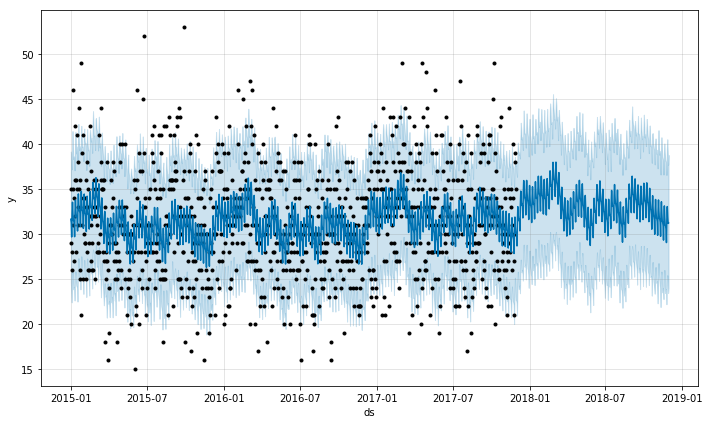

In [77]:
fig = m63.plot(forecast)

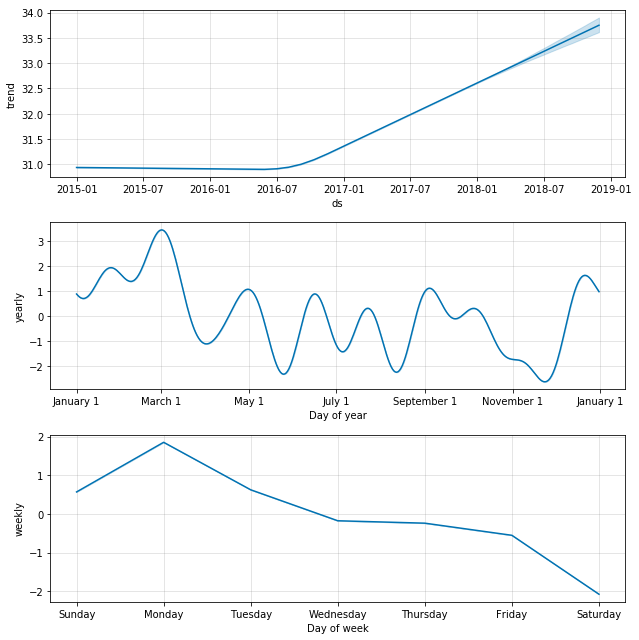

In [78]:
fig = m63.plot_components(forecast)

In [79]:
df_cv = cross_validation(m63, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  35.508332  5.958887  4.514330  0.146010  0.857143
21 22 days  41.473774  6.440013  4.961155  0.156260  0.809524
22 23 days  43.107147  6.565603  5.083275  0.157324  0.761905
23 24 days  42.327260  6.505940  4.924674  0.151902  0.761905
24 25 days  43.613568  6.604057  5.102927  0.156909  0.761905

In [80]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.16507850332842078


# Zone 7: Northeast

In [81]:
dispatch_71 = data_zones[(data_zones['New_Zone'] == 6) & (data_zones['Mission_Type'] == 0)]
dispatch_71 = dispatch_71.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_72 = data_zones[(data_zones['New_Zone'] == 6) & (data_zones['Mission_Type'] == 1)]
dispatch_72 = dispatch_72.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_73 = data_zones[(data_zones['New_Zone'] == 6) & (data_zones['Mission_Type'] == 2)]
dispatch_73 = dispatch_73.groupby(['Response_Date_Day']).count()['Master_Incident_Number']

Text(0.5,1,'Zone 7')

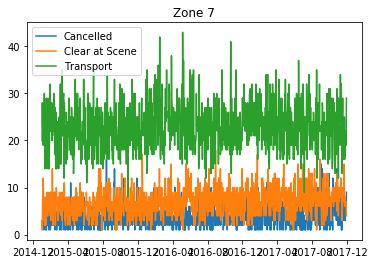

In [82]:
plt.plot(dispatch_71, label='Cancelled')
plt.plot(dispatch_72, label='Clear at Scene')
plt.plot(dispatch_73, label='Transport')
plt.legend()
plt.title('Zone 7')

# Zone 8: Mexican Border

In [83]:
# Processing
dispatch_81 = data_zones[(data_zones['New_Zone'] == 7) & (data_zones['Mission_Type'] == 0)]
dispatch_81 = dispatch_81.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_82 = data_zones[(data_zones['New_Zone'] == 7) & (data_zones['Mission_Type'] == 1)]
dispatch_82 = dispatch_82.groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_83 = data_zones[(data_zones['New_Zone'] == 7) & (data_zones['Mission_Type'] == 2)]
dispatch_83 = dispatch_83.groupby(['Response_Date_Day']).count()['Master_Incident_Number']

Text(0.5,1,'Zone 1')

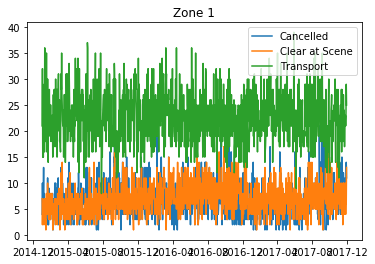

In [84]:
plt.plot(dispatch_81, label='Cancelled')
plt.plot(dispatch_82, label='Clear at Scene')
plt.plot(dispatch_83, label='Transport')
plt.legend()
plt.title('Zone 1')

## Prophet analysis 81

In [85]:
df_dispatch_81 = pd.DataFrame(dispatch_81.index)
df_dispatch_81['y'] = dispatch_81.values
df_dispatch_81.columns = ['ds', 'y']

m81 = Prophet(daily_seasonality=False)
m81.fit(df_dispatch_81)
future = m81.make_future_dataframe(periods=365)
forecast = m81.predict(future)

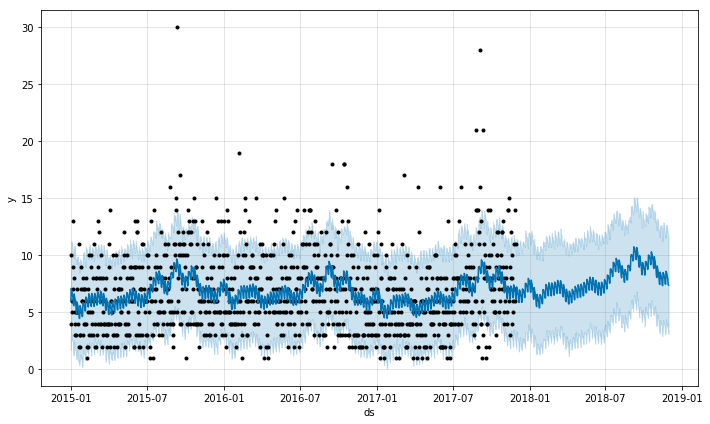

In [86]:
fig = m81.plot(forecast)

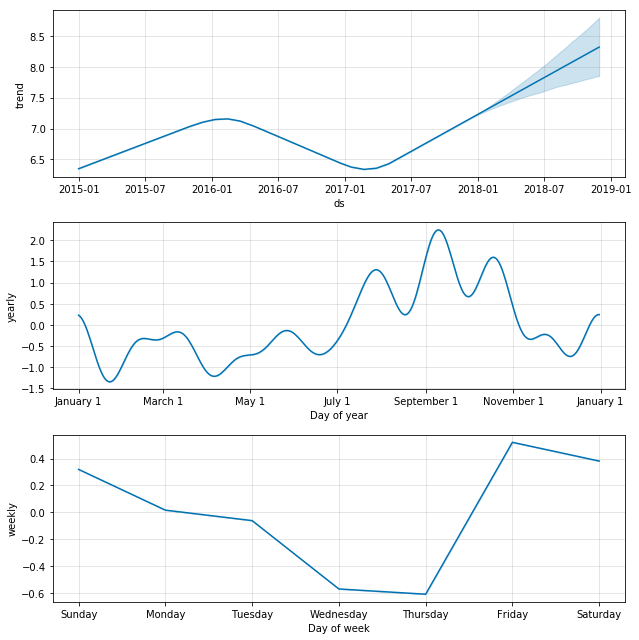

In [87]:
fig = m81.plot_components(forecast)

In [88]:
df_cv = cross_validation(m81, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon       mse      rmse       mae      mape  coverage
20 21 days  5.456413  2.335897  1.791403  0.493862  0.857143
21 22 days  5.703349  2.388169  1.819385  0.320147  0.857143
22 23 days  5.661011  2.379288  1.809169  0.318688  0.857143
23 24 days  6.046314  2.458925  1.892407  0.326235  0.857143
24 25 days  5.693273  2.386058  1.831147  0.320908  0.857143

In [89]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.5178375541098694


# Prophet analysis 82

In [90]:
df_dispatch_82 = pd.DataFrame(dispatch_82.index)
df_dispatch_82['y'] = dispatch_82.values
df_dispatch_82.columns = ['ds', 'y']

m82 = Prophet(daily_seasonality=False)
m82.fit(df_dispatch_82)
future = m82.make_future_dataframe(periods=365)
forecast = m82.predict(future)

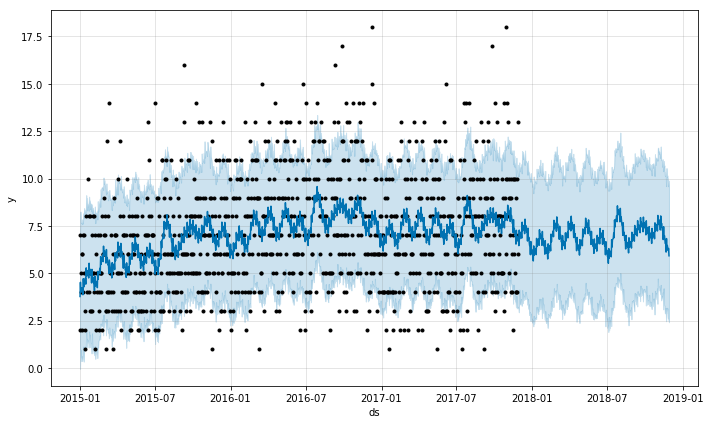

In [91]:
fig = m82.plot(forecast)

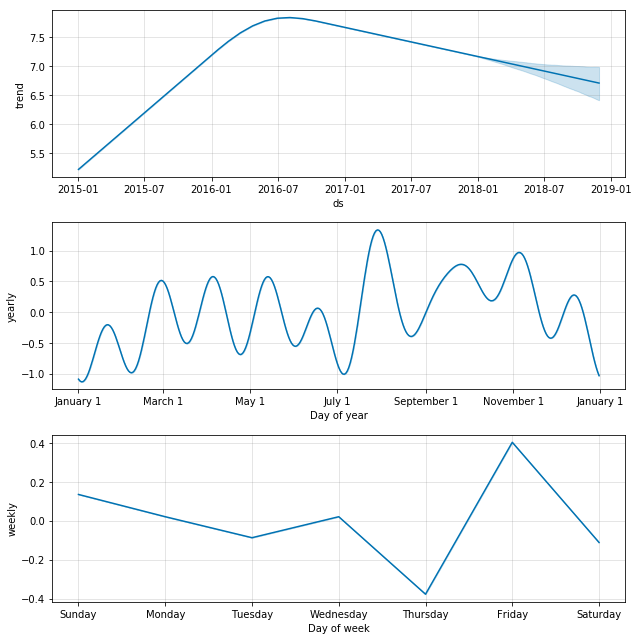

In [92]:
fig = m82.plot_components(forecast)

In [93]:
df_cv = cross_validation(m82, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon       mse      rmse       mae      mape  coverage
20 21 days  8.691769  2.948181  2.424597  0.632645  0.714286
21 22 days  7.998490  2.828160  2.265381  0.619421  0.761905
22 23 days  7.990935  2.826824  2.260539  0.618816  0.761905
23 24 days  8.089659  2.844233  2.300824  0.628146  0.761905
24 25 days  8.362169  2.891741  2.405871  0.649849  0.761905

In [94]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.5013159132085167


## Prophet analysis 83

In [95]:
df_dispatch_83 = pd.DataFrame(dispatch_83.index)
df_dispatch_83['y'] = dispatch_83.values
df_dispatch_83.columns = ['ds', 'y']

m83 = Prophet(daily_seasonality=False)
m83.fit(df_dispatch_83)
future = m83.make_future_dataframe(periods=365)
forecast = m83.predict(future)

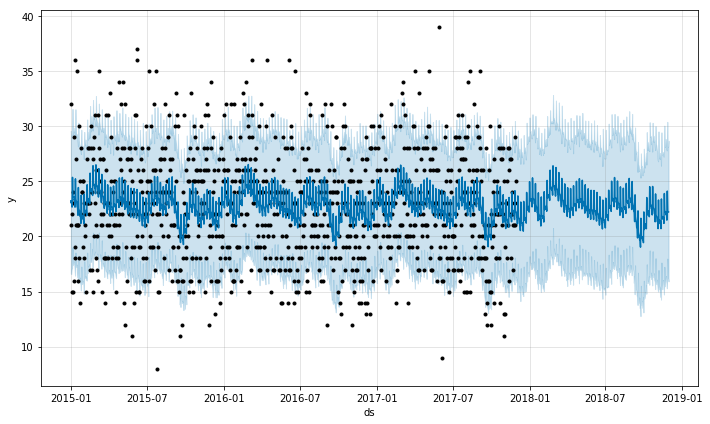

In [96]:
fig = m83.plot(forecast)

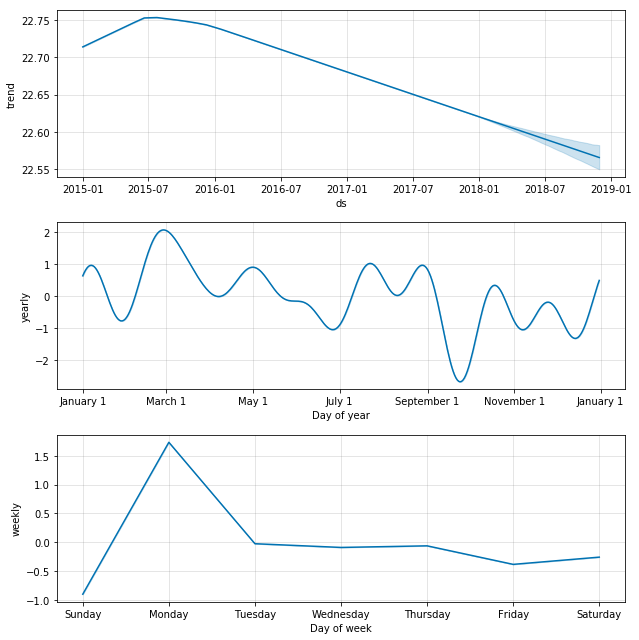

In [97]:
fig = m83.plot_components(forecast)

In [98]:
df_cv = cross_validation(m83, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon        mse      rmse       mae      mape  coverage
20 21 days  22.609138  4.754907  3.701572  0.149067  0.809524
21 22 days  22.875277  4.782811  3.740433  0.148905  0.809524
22 23 days  22.853478  4.780531  3.728428  0.148472  0.809524
23 24 days  21.158908  4.599881  3.568193  0.144011  0.857143
24 25 days  15.209020  3.899874  3.246357  0.144291  0.904762

In [99]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.194311581259227


# City-wide

In [100]:
dispatch_01 = data_zones[data_zones['Mission_Type'] == 0].groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_02 = data_zones[data_zones['Mission_Type'] == 1].groupby(['Response_Date_Day']).count()['Master_Incident_Number']
dispatch_03 = data_zones[data_zones['Mission_Type'] == 2].groupby(['Response_Date_Day']).count()['Master_Incident_Number']

Text(0.5,1,'City of San Diego')

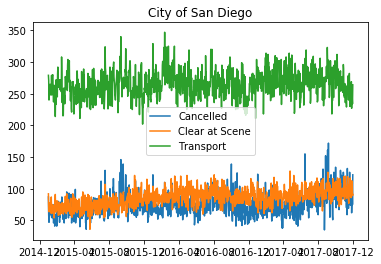

In [101]:
plt.plot(dispatch_01, label='Cancelled')
plt.plot(dispatch_02, label='Clear at Scene')
plt.plot(dispatch_03, label='Transport')
plt.legend()
plt.title('City of San Diego')

## Prophet analysis 01

In [102]:
df_dispatch_01 = pd.DataFrame(dispatch_01.index)
df_dispatch_01['y'] = dispatch_01.values
df_dispatch_01.columns = ['ds', 'y']

m01 = Prophet(daily_seasonality=False)
m01.fit(df_dispatch_01)
future = m01.make_future_dataframe(periods=365)
forecast = m01.predict(future)

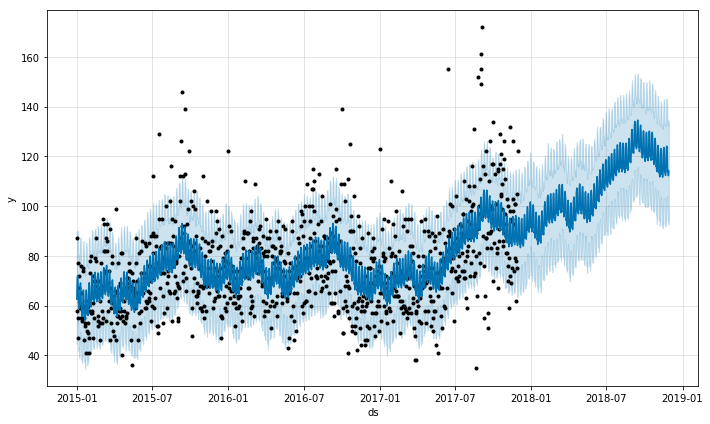

In [103]:
fig = m01.plot(forecast)

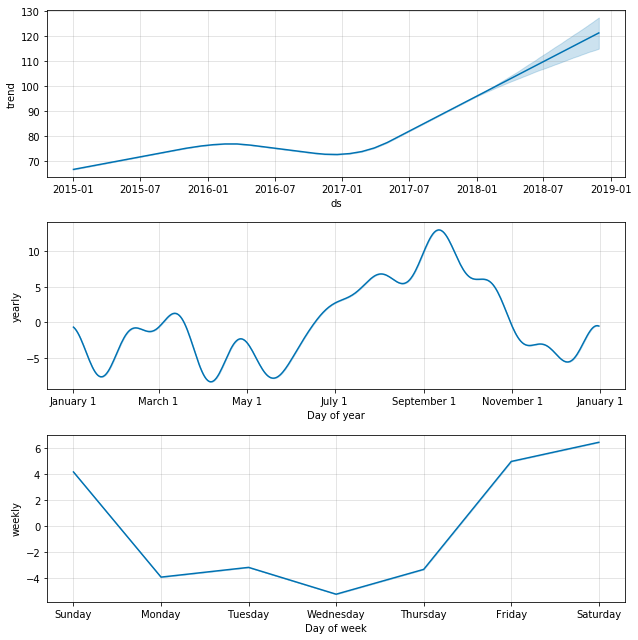

In [104]:
fig = m01.plot_components(forecast)

In [105]:
df_cv = cross_validation(m01, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon         mse       rmse        mae      mape  coverage
20 21 days  190.527641  13.803175  11.116657  0.178692  0.809524
21 22 days  213.284815  14.604274  11.673772  0.184286  0.761905
22 23 days  215.925417  14.694401  11.923903  0.187937  0.761905
23 24 days  235.158670  15.334884  12.768498  0.197910  0.714286
24 25 days  214.848957  14.657727  11.964830  0.181313  0.761905

In [106]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.21130842139262154


## Prophet analysis 02

In [107]:
df_dispatch_02 = pd.DataFrame(dispatch_02.index)
df_dispatch_02['y'] = dispatch_02.values
df_dispatch_02.columns = ['ds', 'y']

m02 = Prophet(daily_seasonality=False)
m02.fit(df_dispatch_02)
future = m02.make_future_dataframe(periods=365)
forecast = m02.predict(future)

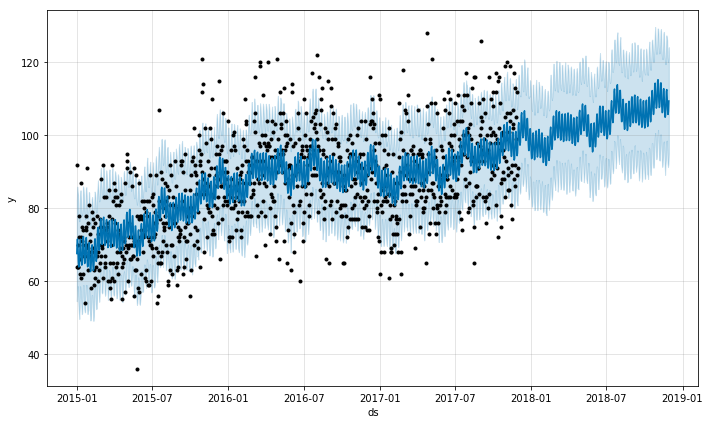

In [108]:
fig = m02.plot(forecast)

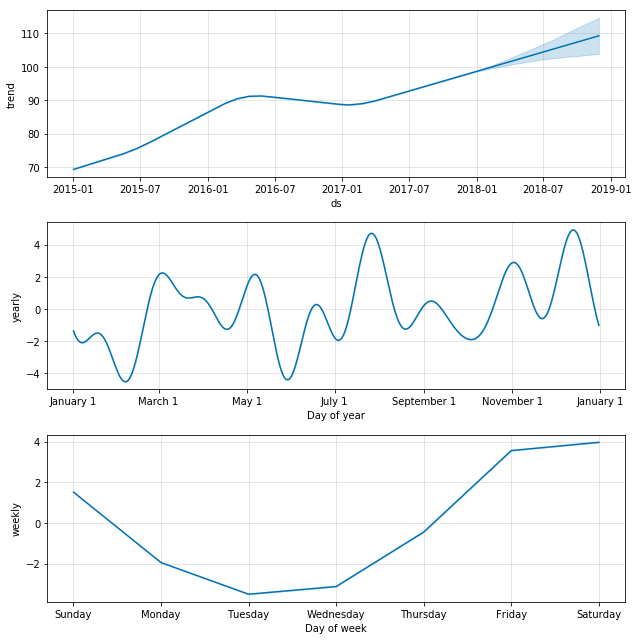

In [109]:
fig = m02.plot_components(forecast)

In [110]:
df_cv = cross_validation(m02, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon         mse       rmse       mae      mape  coverage
20 21 days  156.261753  12.500470  9.529996  0.098043  0.666667
21 22 days  148.251651  12.175863  9.174984  0.095006  0.714286
22 23 days  139.556648  11.813410  8.561581  0.088822  0.761905
23 24 days  116.486819  10.792906  7.639215  0.080746  0.809524
24 25 days  114.808549  10.714875  7.487583  0.078863  0.809524

In [111]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.1416507036427899


## Prophet analysis 03

In [112]:
df_dispatch_03 = pd.DataFrame(dispatch_03.index)
df_dispatch_03['y'] = dispatch_03.values
df_dispatch_03.columns = ['ds', 'y']

m03 = Prophet(daily_seasonality=False)
m03.fit(df_dispatch_03)
future = m03.make_future_dataframe(periods=365)
forecast = m03.predict(future)

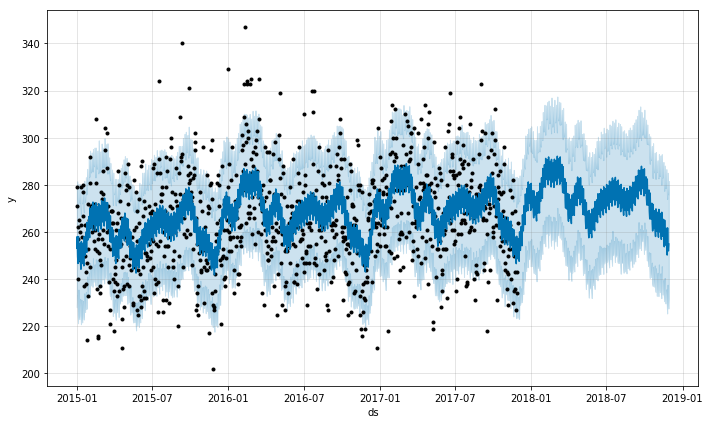

In [113]:
fig = m03.plot(forecast)

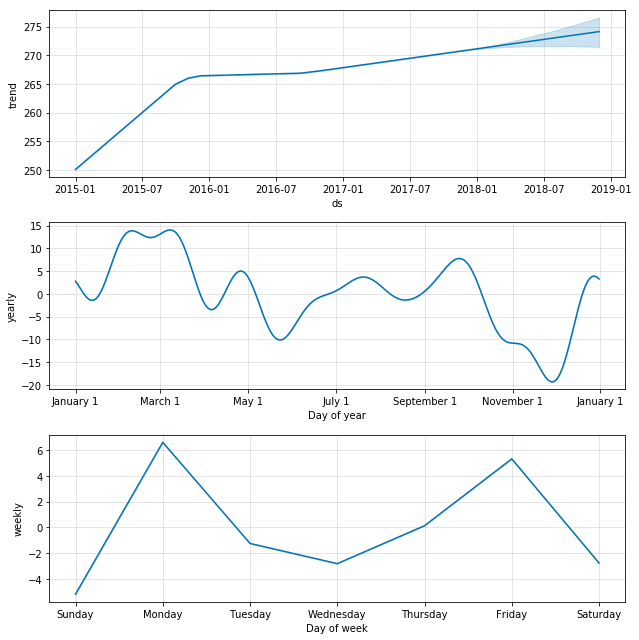

In [114]:
fig = m03.plot_components(forecast)

In [115]:
df_cv = cross_validation(m03, initial='851 days', period='7 days', horizon = '212 days')
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet.diagnostics:Making 1 forecasts with cutoffs between 2017-05-01 00:00:00 and 2017-05-01 00:00:00


horizon         mse       rmse        mae      mape  coverage
20 21 days  326.843482  18.078813  12.946588  0.051574  0.857143
21 22 days  359.652684  18.964511  14.192250  0.055914  0.809524
22 23 days  351.395705  18.745552  13.714324  0.054039  0.809524
23 24 days  348.085217  18.657042  13.489684  0.053322  0.809524
24 25 days  362.576497  19.041442  14.066048  0.055280  0.809524

In [116]:
print('Prophet MAPE:', np.mean(df_p['mape']))

Prophet MAPE: 0.05615672203220373
